## OIE.INT
- http://www.oie.int/wahis_2/public/wahid.php/Diseaseinformation/Immsummary

### 使用requests 取得列表頁面

In [1]:
import requests
url = 'http://www.oie.int/wahis_2/public/wahid.php/Diseaseinformation/Immsummary'

payload = {
'disease_type_hidden':'0',
'disease_id_hidden':'15',
'selected_disease_name_hidden':'Highly path. avian influenza (- -) ',
'disease_type':'0',
'disease_id_terrestrial':'15',
'disease_id_aquatic':'-999',
'year':'2017'
}

res = requests.post(url, data=payload)

### 使用BeautfulSoup 剖析頁面

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

### 取得報告連結

In [15]:
alinks = soup.select('.vacborder a')

### 取得報告內頁摘要

In [63]:
#取得現在時間
from datetime import datetime
datetime.now()

datetime.datetime(2017, 8, 23, 10, 38, 40, 709239)

In [74]:
reportURL = 'http://www.oie.int/wahis_2/public/wahid.php/Reviewreport/Review?page_refer=MapFullEventReport&reportid={}'

def getReportDetail(reportID):
    url  = reportURL.format(reportID)
    res  = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    country = soup.select('.Rap12-Subtitle')[0].contents[-1]
    
    # 使用prettify 可將 tag 轉換成字串
    dfs  = pandas.read_html(soup.select('.TableFoyers')[0].prettify())
    
    # 將資料轉置
    df = dfs[0].T
    # 將第一列變成欄位名
    df.columns = df.ix[0,]
    # 將第一列刪除
    df = df.drop(0)
    # 增添國家資訊
    df['country'] = country
    
    # 增添抓取時間
    df['search_time'] = datetime.now()
    
    #增添reportID
    df['reportID']  = reportID
    
    # 增添 reportURL
    df['reportURL'] = url
    return df

### 根據每個報告連結取得內文摘要

In [75]:
import re


cnt = 0
report_ary = []
for link in alinks:
    if 'MapFullEventReport' in link['href']:
        # method 1: use split and strip
        reportid = link['href'].split(',',)[1].strip(');')
        report_ary.append(getReportDetail(reportid))
        
        # 當取得第五份報告時, 停止, 如果要取得所有報告, 就把下面程式碼拿掉
        cnt = cnt + 1
        if cnt == 5:
            break
        
        # method 2: use regular expression
        #m = re.match('javascript: open_report\("(.*?)",(\d+)\);', link['href'])
        #print(m.groups())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


### 使用Pandas 合併報告

In [77]:
reportdf = pandas.concat(report_ary)
reportdf.columns
reportdf = reportdf[(['reportID', 'reportURL', 'search_time', 'Causal agent', 'Date event resolved',
       'Date of confirmation of the event', 'Date of previous occurrence',
       'Date of start of the event', 'Date submitted to OIE',
       'Manifestation of disease', 'Nature of diagnosis',
       'Reason for notification', 'Related reports', 'Report date',
       'Report type', 'Serotype', 'This event pertains to', 'country'])]
reportdf.head()

,reportID,reportURL,search_time,Causal agent,Date event resolved,Date of confirmation of the event,Date of previous occurrence,Date of start of the event,Date submitted to OIE,Manifestation of disease,Nature of diagnosis,Reason for notification,Related reports,Report date,Report type,Serotype,This event pertains to,country
1,21433,http://www.oie.int/wahis_2/public/wahid.php/Re...,2017-08-23 10:52:27.221628,Highly pathogenic avian influenza virus,19/01/2017,30/10/2016,NaN,20/10/2016,02/11/2016,NaN,"Clinical, Laboratory (advanced)",First occurrence of a listed disease in the co...,Immediate notification (02/11/2016) Follow-up...,02/11/2016,Immediate notification,H7N1,a defined zone within the country,Algeria
1,21489,http://www.oie.int/wahis_2/public/wahid.php/Re...,2017-08-23 10:52:32.695203,Highly pathogenic avian influenza virus,28/04/2017,09/11/2016,26/04/2006,07/11/2016,10/11/2016,Clinical disease,Laboratory (advanced),Recurrence of a listed disease,Immediate notification (10/11/2016) Follow-up...,10/11/2016,Immediate notification,H5N8,a defined zone within the country,Austria
1,21520,http://www.oie.int/wahis_2/public/wahid.php/Re...,2017-08-23 10:52:38.157587,Highly pathogenic avian influenza virus,20/02/2017,11/11/2016,26/04/2006,09/11/2016,11/11/2016,Clinical disease,Laboratory (advanced),Recurrence of a listed disease,Immediate notification (11/11/2016) Follow-up...,11/11/2016,Immediate notification,H5N8,a defined zone within the country,Austria
1,22467,http://www.oie.int/wahis_2/public/wahid.php/Re...,2017-08-23 10:52:43.590260,Highly Pathogenic Avian Influenza virus,NaN,16/01/2017,04/02/2016,15/01/2017,21/01/2017,Clinical disease,"Clinical, Laboratory (basic), Laboratory (adva...",Recurrence of a listed disease,Immediate notification (21/01/2017) Follow-up...,21/01/2017,Immediate notification,H5N1,a defined zone within the country,Bangladesh
1,24102,http://www.oie.int/wahis_2/public/wahid.php/Re...,2017-08-23 10:52:49.307737,Highly pathogenic avian influenza virus,NaN,16/06/2017,28/03/2017,10/06/2017,19/06/2017,Clinical disease,"Clinical, Laboratory (advanced), Necropsy",Recurrence of a listed disease,Immediate notification (19/06/2017) Follow-up...,19/06/2017,Immediate notification,H5N8,a defined zone within the country,Belgium


### 使用Pandas匯出報告

In [68]:
reportdf.to_excel('HPAI.xlsx')

### ==========以下為實驗===========

In [50]:
res  = requests.get('http://www.oie.int/wahis_2/public/wahid.php/Reviewreport/Review?page_refer=MapFullEventReport&reportid=21433')
soup = BeautifulSoup(res.text, 'html.parser')
soup.select('.Rap12-Subtitle')

[<div class="Rap12-Subtitle">Highly pathogenic avian influenza,<br/>Algeria</div>]

In [55]:
soup.select('.Rap12-Subtitle')[0].contents[-1]

'Algeria'

In [73]:
a = '<a  href="#" qoo=123 class="ok">123</a>'
soup2 = BeautifulSoup(a, 'html.parser')
type(soup2.select('a')[0])

bs4.element.Tag

## 使用Numpy

In [81]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]

for i in range(0, len(a)):
    print(i, a[i], b[i], a[i] * b[i])

0 1 2 2
1 3 4 12
2 5 6 30
3 7 8 56
4 9 10 90


In [83]:
for ele in zip(a,b):
    print(ele)

(1, 2)
(3, 4)
(5, 6)
(7, 8)
(9, 10)


In [84]:
i,j = (1,2)
i

1

In [85]:
for i,j in zip(a,b):
    print(i + j)

3
7
11
15
19


In [86]:
import numpy
na = numpy.array(a)
nb = numpy.array(b)
na + nb

array([ 3,  7, 11, 15, 19])

In [87]:
import numpy as np
na = np.array([1,2,3,4,5])
na[0]

1

In [88]:
na[1:3]

array([2, 3])

In [90]:
na > 3

array([False, False, False,  True,  True], dtype=bool)

In [91]:
na[na > 3]

array([4, 5])

In [93]:
na = np.array(
    [ 
        [1,2,3,4, 5],
        [6,7,8,9,10]
    ]
)

na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [94]:
na[0,0]

1

In [95]:
na[0,:]

array([1, 2, 3, 4, 5])

In [96]:
na[:,0]

array([1, 6])

In [97]:
na.T

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [98]:
na=np.array([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]])
na

array([['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']], 
      dtype='<U5')

## 使用Pandas

In [101]:
import pandas 
df = pandas.DataFrame([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]])
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
0    6 non-null object
1    6 non-null object
2    6 non-null int64
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [103]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [104]:
df.columns = ['name', 'gender', 'age']

In [105]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [106]:
df['age']

0    29
1    23
2    35
3    33
4    21
5    20
Name: age, dtype: int64

In [107]:
df['age'].mean()

26.833333333333332

In [108]:
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [110]:
df[df['gender'] == 'M']

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [111]:
df.groupby('gender')['age'].mean()

gender
F    21.333333
M    32.333333
Name: age, dtype: float64

Populating the interactive namespace from numpy and matplotlib


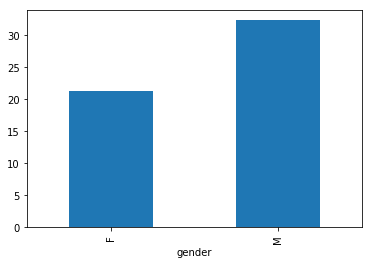

In [114]:
%pylab inline
df.groupby('gender')['age'].mean().plot(kind= 'bar')

## Pandas Series

In [115]:
import pandas as pd
s = pd.Series([21000,18900,18000])
s

0    21000
1    18900
2    18000
dtype: int64

In [116]:
pd.Series([21000,18900,18000],index=['Iphone','Edge S7','HTC M1'])

Iphone     21000
Edge S7    18900
HTC M1     18000
dtype: int64

In [118]:
s= pd.Series({'Iphone':21000,'Edge S7':18900,'HTC M1':18000})
s

Edge S7    18900
HTC M1     18000
Iphone     21000
dtype: int64

In [120]:
s[2]

21000

In [121]:
s[1:3]

HTC M1    18000
Iphone    21000
dtype: int64

In [122]:
s['Iphone']

21000

In [123]:
s[['Iphone', 'Edge S7']]

Iphone     21000
Edge S7    18900
dtype: int64

In [125]:
s < 20000

Edge S7     True
HTC M1      True
Iphone     False
dtype: bool

In [126]:
s[s<20000]

Edge S7    18900
HTC M1     18000
dtype: int64

In [128]:
cheap = s < 20000

In [129]:
s[cheap]

Edge S7    18900
HTC M1     18000
dtype: int64

In [130]:
s['Iphone']

21000

In [131]:
s['Iphone'] = 20000

In [132]:
s['Iphone']

20000

In [135]:
s[s<20000] = s[s<20000] * 0.8

In [136]:
s

Edge S7    15120
HTC M1     14400
Iphone     20000
dtype: int64

In [138]:
'Iphone' in s

True

In [139]:
'mi' in s

False

In [141]:
s * 0.8

Edge S7    12096.0
HTC M1     11520.0
Iphone     16000.0
dtype: float64

In [142]:
import numpy
numpy.sqrt(s)

Edge S7    122.963409
HTC M1     120.000000
Iphone     141.421356
dtype: float64

In [143]:
s.max()

20000

In [144]:
s.min()

14400

In [145]:
s.mean()

16506.666666666668

In [146]:
s.describe()

count        3.000000
mean     16506.666667
std       3046.659373
min      14400.000000
25%      14760.000000
50%      15120.000000
75%      17560.000000
max      20000.000000
dtype: float64

In [147]:
s[['Iphone','HTC M1']]

Iphone    20000
HTC M1    14400
dtype: int64

In [148]:
#NaN = Not A Number
s[['mi','HTC M1']]

mi            NaN
HTC M1    14400.0
dtype: float64

In [150]:
s2 = s[['Iphone','HTC M1']] + s[['mi','HTC M1']]
s2

HTC M1    28800.0
Iphone        NaN
mi            NaN
dtype: float64

In [151]:
s2.isnull()

HTC M1    False
Iphone     True
mi         True
dtype: bool

In [152]:
s2.notnull()

HTC M1     True
Iphone    False
mi        False
dtype: bool

## Pandas DataFrame

In [153]:
df=pd.DataFrame([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]])
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [154]:
df.columns = ['name', 'gender', 'age']
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [155]:
df=pd.DataFrame([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]],
                columns=['name','gender','age'])
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [157]:
df=pd.DataFrame([{'name':'frank','gender':'M','age':29},\
                 {'name':'mary','gender':'F','age':23},\
                 {'name':'tom','gender':'M','age':35},\
                 {'name':'ted','gender':'M','age':33},\
                 {'name':'jean','gender':'F','age':21},\
                 {'name':'lisa','gender':'F','age':20}])
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [159]:
df = pandas.DataFrame([
        {'name':'Mary', 'gender':'F'},
        {'name':'John', 'gender':'M', 'age':38},
        {'name':'Joe', 'gender':'M', 'age':47, 'title':'Dr'}])
df

,age,gender,name,title
0,NaN,F,Mary,NaN
1,38.0,M,John,NaN
2,47.0,M,Joe,Dr


In [205]:
df=pandas.DataFrame([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]],columns=['name','gender','age'])
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [163]:
#df.ix[0]
df.iloc[0]

name      frank
gender        M
age          29
Name: 0, dtype: object

In [164]:
#df.ix[1:4]
df.iloc[1:4]

,name,gender,age
1,mary,F,23
2,tom,M,35
3,ted,M,33


In [165]:
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [166]:
df[['name', 'age']]

,name,age
0,frank,29
1,mary,23
2,tom,35
3,ted,33
4,jean,21
5,lisa,20


In [172]:
#df.ix[ 1:2   ,  ['name', 'age']  ]
df.loc[ 1:2   ,  ['name', 'age']  ]

,name,age
1,mary,23
2,tom,35


In [175]:
df['gender'] == 'M'

0     True
1    False
2     True
3     True
4    False
5    False
Name: gender, dtype: bool

In [176]:
df[df['gender'] == 'M']

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [179]:
(df['gender'] == 'M') & (df['age'] > 30)

0    False
1    False
2     True
3     True
4    False
5    False
dtype: bool

In [180]:
df[(df['gender'] == 'M') & (df['age'] > 30)]

,name,gender,age
2,tom,M,35
3,ted,M,33


In [181]:
df[(df['gender'] == 'M') | (df['age'] > 30)]

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [184]:
# 預設前五筆資料
df.head()

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21


In [185]:
df.head(3)

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35


In [186]:
# 預設後五筆資料
df.tail()

,name,gender,age
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [187]:
df.tail(3)

,name,gender,age
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
name      6 non-null object
gender    6 non-null object
age       6 non-null int64
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [189]:
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [190]:
df.dtypes

name      object
gender    object
age        int64
dtype: object

In [192]:
df['employee'] = True

In [193]:
df

,name,gender,age,employee
0,frank,M,29,True
1,mary,F,23,True
2,tom,M,35,True
3,ted,M,33,True
4,jean,F,21,True
5,lisa,F,20,True


In [194]:
a = 30
a

30

In [195]:
del a

In [196]:
a

NameError: name 'a' is not defined

In [197]:
del df['employee']

In [208]:
df['employee'] = True

In [209]:
# 將修改完的結果塞回df
#df = df.drop('employee',  axis = 1)

# 直接修改df 的內容
df.drop('employee',  axis = 1, inplace=True)

In [207]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [212]:
df2 = pandas.DataFrame([['a', '1'], ['a', '2'], ['b', '3'], ['b', '3']])
df2.drop_duplicates()
df2.drop_duplicates(0,keep='last')

,0,1
1,a,2
3,b,3


In [213]:
df.loc[6]={'age':20,'gender':'F','name':'qoo'}
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20
6,qoo,F,20


In [215]:
df = df.append(pd.DataFrame([{'age':20,'gender':'F','name':'qoo2'}]))
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
6,20,F,qoo
0,20,F,qoo2


In [216]:
df = df.append(pd.DataFrame([{'age':20,'gender':'F','name':'qoo3'}]), ignore_index=True)
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
6,20,F,qoo
7,20,F,qoo2
8,20,F,qoo3


In [219]:
df['userid'] = range(101,110)

In [221]:
df.set_index('userid', inplace=True)

In [222]:
df

,age,gender,name
userid,,,
101,29,M,frank
102,23,F,mary
103,35,M,tom
104,33,M,ted
105,21,F,jean
106,20,F,lisa
107,20,F,qoo
108,20,F,qoo2
109,20,F,qoo3


In [224]:
df.iloc[1]

age         23
gender       F
name      mary
Name: 102, dtype: object

In [228]:
df.iloc[[1,3,5]]

,age,gender,name
userid,,,
102,23,F,mary
104,33,M,ted
106,20,F,lisa


In [229]:
df.loc[[101,103,105]]

,age,gender,name
userid,,,
101,29,M,frank
103,35,M,tom
105,21,F,jean


## 資料清理實務

In [231]:
import pandas
df = pandas.read_excel('fic.xlsx')
df.head()

,author,content,dt,source,title
0,kickingbird,2017年8月14日，湘西自治州報告一例人感染H7N9流感確診病例。患者莫某某，48歲，以收...,2017-08-15 11:58:00,湖南省疾病預防控制中心,中國：湖南省湘西自治州報告一例人感染H7N9流感確診病例
1,kickingbird,衛生署衛生防護中心今日（八月四日）正監察國家衛生和計劃生育委員會通報在七月二十八日至八月三日...,2017-08-05 19:19:00,香港衛生防護中心,中國：香港衛生防護中心獲通報福建人類感染甲型禽流感（H7N9）個案
2,kickingbird,農業部新聞辦公室8月1日發布，內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流...,2017-08-05 19:16:00,中國農業部,中國：內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流感疫情
3,kickingbird,有關陽性樣品說明：\n 一、H7亞型禽流感血清學陽性樣品（3018份）\n （一）北京...,2017-07-26 10:34:00,中國農業部,中國：2017年6月全國動物H7N9流感監測情況
4,kickingbird,香港衛生署衛生防護中心（七月二十一日）正監察國家衛生和計劃生育委員會通報在七月十四至二十日期...,2017-07-23 16:48:00,香港衛生防護中心,中國：香港衛生防護中心獲通報江蘇人類感染甲型禽流感(H7N9)個案


In [233]:
import pandas
df = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/fic.xlsx')
df.head()

,author,content,dt,source,title
0,kickingbird,2017年8月14日，湘西自治州報告一例人感染H7N9流感確診病例。患者莫某某，48歲，以收...,2017-08-15 11:58:00,湖南省疾病預防控制中心,中國：湖南省湘西自治州報告一例人感染H7N9流感確診病例
1,kickingbird,衛生署衛生防護中心今日（八月四日）正監察國家衛生和計劃生育委員會通報在七月二十八日至八月三日...,2017-08-05 19:19:00,香港衛生防護中心,中國：香港衛生防護中心獲通報福建人類感染甲型禽流感（H7N9）個案
2,kickingbird,農業部新聞辦公室8月1日發布，內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流...,2017-08-05 19:16:00,中國農業部,中國：內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流感疫情
3,kickingbird,有關陽性樣品說明：\n 一、H7亞型禽流感血清學陽性樣品（3018份）\n （一）北京...,2017-07-26 10:34:00,中國農業部,中國：2017年6月全國動物H7N9流感監測情況
4,kickingbird,香港衛生署衛生防護中心（七月二十一日）正監察國家衛生和計劃生育委員會通報在七月十四至二十日期...,2017-07-23 16:48:00,香港衛生防護中心,中國：香港衛生防護中心獲通報江蘇人類感染甲型禽流感(H7N9)個案


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
author     100 non-null object
content    100 non-null object
dt         100 non-null datetime64[ns]
source     100 non-null object
title      100 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 4.7+ KB


In [241]:
# 當是時間的資料時
df['dt'].dt.year.head()
df['dt'].dt.month.head()
df['dt'].dt.day.head()
df['dt'].dt.date.head()

0    2017-08-15
1    2017-08-05
2    2017-08-05
3    2017-07-26
4    2017-07-23
Name: dt, dtype: object

In [244]:
df.sort_values('dt').head()

,author,content,dt,source,title
99,kickingbird,2017年4月13日，天津市確診一例H7N9病例。目前患者在定點醫院由市級專家組進行治療。與...,2017-04-14 08:56:00,天津市衛生計生委,中國：天津市確診一例H7N9病例
87,kickingbird,2017年3月27日-4月9日，安徽省阜陽市報告1例H7N9病例（71歲男性，重症肺炎），無...,2017-04-14 18:38:00,安徽省衛生計生委,中國：安徽省阜陽市報告1例H7N9病例
98,kickingbird,2017年4月8日至14日，我省新增南陽市1例、平頂山市1例，共計2例H7N9流感病例。 ...,2017-04-14 20:23:00,河南省衛計委,中國：河南省新增2例H7N9流感病例
94,kickingbird,自2017年4月3日，拉薩市確診1例感染H7N9病例以來，自治區黨委、政府高度重視，自治區H...,2017-04-15 08:33:00,西藏衛生計生委,中國：拉薩市新增兩例H7N9病例
90,kickingbird,4月14日，山東省青島、濰坊市各新增1例H7N9流感確診病例。\n\n\n\n相關文獻： \...,2017-04-15 12:57:00,山東省衛生計生委,中國：山東省青島市濰坊市各新增一例人感染H7N9流感病例


In [245]:
df.sort_values('dt', ascending=False).head()

,author,content,dt,source,title
0,kickingbird,2017年8月14日，湘西自治州報告一例人感染H7N9流感確診病例。患者莫某某，48歲，以收...,2017-08-15 11:58:00,湖南省疾病預防控制中心,中國：湖南省湘西自治州報告一例人感染H7N9流感確診病例
1,kickingbird,衛生署衛生防護中心今日（八月四日）正監察國家衛生和計劃生育委員會通報在七月二十八日至八月三日...,2017-08-05 19:19:00,香港衛生防護中心,中國：香港衛生防護中心獲通報福建人類感染甲型禽流感（H7N9）個案
2,kickingbird,農業部新聞辦公室8月1日發布，內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流...,2017-08-05 19:16:00,中國農業部,中國：內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流感疫情
3,kickingbird,有關陽性樣品說明：\n 一、H7亞型禽流感血清學陽性樣品（3018份）\n （一）北京...,2017-07-26 10:34:00,中國農業部,中國：2017年6月全國動物H7N9流感監測情況
4,kickingbird,香港衛生署衛生防護中心（七月二十一日）正監察國家衛生和計劃生育委員會通報在七月十四至二十日期...,2017-07-23 16:48:00,香港衛生防護中心,中國：香港衛生防護中心獲通報江蘇人類感染甲型禽流感(H7N9)個案


In [246]:
df.columns

Index(['author', 'content', 'dt', 'source', 'title'], dtype='object')

In [249]:
df[['author', 'dt', 'title', 'content',  'source']].head()

,author,dt,title,content,source
0,kickingbird,2017-08-15 11:58:00,中國：湖南省湘西自治州報告一例人感染H7N9流感確診病例,2017年8月14日，湘西自治州報告一例人感染H7N9流感確診病例。患者莫某某，48歲，以收...,湖南省疾病預防控制中心
1,kickingbird,2017-08-05 19:19:00,中國：香港衛生防護中心獲通報福建人類感染甲型禽流感（H7N9）個案,衛生署衛生防護中心今日（八月四日）正監察國家衛生和計劃生育委員會通報在七月二十八日至八月三日...,香港衛生防護中心
2,kickingbird,2017-08-05 19:16:00,中國：內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流感疫情,農業部新聞辦公室8月1日發布，內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流...,中國農業部
3,kickingbird,2017-07-26 10:34:00,中國：2017年6月全國動物H7N9流感監測情況,有關陽性樣品說明：\n 一、H7亞型禽流感血清學陽性樣品（3018份）\n （一）北京...,中國農業部
4,kickingbird,2017-07-23 16:48:00,中國：香港衛生防護中心獲通報江蘇人類感染甲型禽流感(H7N9)個案,香港衛生署衛生防護中心（七月二十一日）正監察國家衛生和計劃生育委員會通報在七月十四至二十日期...,香港衛生防護中心


In [251]:
df[['title', 'author']].head()

,title,author
0,中國：湖南省湘西自治州報告一例人感染H7N9流感確診病例,kickingbird
1,中國：香港衛生防護中心獲通報福建人類感染甲型禽流感（H7N9）個案,kickingbird
2,中國：內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流感疫情,kickingbird
3,中國：2017年6月全國動物H7N9流感監測情況,kickingbird
4,中國：香港衛生防護中心獲通報江蘇人類感染甲型禽流感(H7N9)個案,kickingbird


In [252]:
df = df[['author', 'dt', 'title', 'content',  'source']]

In [253]:
df.head()

,author,dt,title,content,source
0,kickingbird,2017-08-15 11:58:00,中國：湖南省湘西自治州報告一例人感染H7N9流感確診病例,2017年8月14日，湘西自治州報告一例人感染H7N9流感確診病例。患者莫某某，48歲，以收...,湖南省疾病預防控制中心
1,kickingbird,2017-08-05 19:19:00,中國：香港衛生防護中心獲通報福建人類感染甲型禽流感（H7N9）個案,衛生署衛生防護中心今日（八月四日）正監察國家衛生和計劃生育委員會通報在七月二十八日至八月三日...,香港衛生防護中心
2,kickingbird,2017-08-05 19:16:00,中國：內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流感疫情,農業部新聞辦公室8月1日發布，內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流...,中國農業部
3,kickingbird,2017-07-26 10:34:00,中國：2017年6月全國動物H7N9流感監測情況,有關陽性樣品說明：\n 一、H7亞型禽流感血清學陽性樣品（3018份）\n （一）北京...,中國農業部
4,kickingbird,2017-07-23 16:48:00,中國：香港衛生防護中心獲通報江蘇人類感染甲型禽流感(H7N9)個案,香港衛生署衛生防護中心（七月二十一日）正監察國家衛生和計劃生育委員會通報在七月十四至二十日期...,香港衛生防護中心


In [262]:
df['source'].value_counts().head()

中國農業部       12
河北省衛生計生委     9
重慶市衛生計生委     6
F.I.C        5
四川省衛生計生委     5
Name: source, dtype: int64

In [263]:
## SELECT source, count(*) FROM df GROUP BY source
df.groupby('source')['title'].count().head()

source
F.I.C       5
中國農業部      12
任丘市衛生局      1
內蒙古疾控中心     1
北京市疾控中心     3
Name: title, dtype: int64

In [265]:
df.groupby(['author', 'source'])['author'].count().head()

author       source 
kickingbird  F.I.C       5
             中國農業部      12
             任丘市衛生局      1
             內蒙古疾控中心     1
             北京市疾控中心     3
Name: author, dtype: int64

In [266]:
df['month'] = df['dt'].dt.month

In [270]:
df.groupby(['month', 'source'])['source'].count().head()

month  source  
4      北京市疾控中心     2
       吉林省衛生計生委    1
       四川省衛生計生委    2
       天津市衛生計生委    1
       威海市衛生計生委    1
Name: source, dtype: int64

In [285]:
cnt=df.groupby(['month', 'source'])['title'].count().to_frame()

#?pandas.pivot_table
#pandas.pivot_table(cnt.to_frame())
pandas.pivot_table(cnt, index='month', values='title', columns='source')
pandas.pivot_table(cnt, index='source', values='title', columns='month',aggfunc='count').head()


month,4,5,6,7,8
source,,,,,
F.I.C,NaN,NaN,1.0,1.0,NaN
中國農業部,NaN,1.0,1.0,1.0,1.0
任丘市衛生局,NaN,1.0,NaN,NaN,NaN
內蒙古疾控中心,NaN,1.0,NaN,NaN,NaN
北京市疾控中心,1.0,1.0,NaN,NaN,NaN


## 正規表達法

In [286]:
import re
p = '0912345678'
s = 'my phone number is 0912345678'
p in s

True

### 比對數字

In [290]:
a = '6'

import re
re.match('6', a)

# []: 可以比對在[]內的任意字元
re.match('[0123456789]', a)

# - : 連續 [0-9]: [0123456789]
re.match('[0-9]', a)

# \d : [0-9]
re.match('\d', a)

<_sre.SRE_Match object; span=(0, 1), match='6'>

### 比對字元

In [296]:
s = 'k'

import re

re.match('[abcdefghijllmnopqrstuvwxyz]', s)

# [a-z] = [abcdefghijklmnopqrstuvwxyz]
re.match('[a-z]', s)

s = 'L'
# 無法比對大寫英文字母
re.match('[a-z]', s)

re.match('[a-zA-Z]', s)


# 比對數字及英文字母
re.match('[a-zA-Z0-9]', s)

# \w = [a-zA-Z0-9]
re.match('\w', s)

<_sre.SRE_Match object; span=(0, 1), match='L'>

### 比對任意字元

In [298]:
s = '$'
re.match('\w', s)

# . = 比對任意字元
re.match('.', s)

<_sre.SRE_Match object; span=(0, 1), match='$'>

### 比對多個字元

In [304]:
s = '8888'

# {4} = 比對到四個字元
re.match('\d{4}', s)

# {3,5} = 比對到 3 ~ 5 個字元
re.match('\d{3,5}', s)

# {1,} = 比對到一個以上字元
re.match('\d{1,}', s)

# + = {1,}
re.match('\d+', s)

# {0,} = 比對到零個以上字元
re.match('\d{0,}', s)

# * = {0,}
re.match('\d*', s)

<_sre.SRE_Match object; span=(0, 4), match='8888'>

### 比對電話號碼

In [308]:
p = '0912345678'
# () 可以將比對到的物件放置到tuple
m = re.match('(\d{10})', p)
m.groups()

('0912345678',)

In [316]:
phones = ['0912345678', '0912-345678', '0912-345-678','0277458421','0932291928492']
for p in phones:
    # 比對到有連續10個數字
    m = re.match('(\d{10})', p )
    # 比對09 開頭的數字
    m = re.match('(09\d{8})', p )
    # 比對中間或有- 或無- 的電話
    m = re.match('(09\d{2}-{0,1}\d{3}-{0,1}\d{3})', p )
    # {0,1} = ?
    m = re.match('(09\d{2}-?\d{3}-?\d{3})', p )
    # ^ 代表限制開頭, $強制結尾
    m = re.match('(^09\d{2}-?\d{3}-?\d{3}$)', p )
    # 比對02 或 09開頭的電話
    m = re.match('(^0[29]\d{2}-?\d{3}-?\d{3}$)', p )
    if m:
        print(m.groups())

('0912345678',)
('0912-345678',)
('0912-345-678',)
('0277458421',)


### 身分證字號比對

In [318]:
ID = 'A140990066'
import re
re.match('[A-Z][12]\d{8}', ID)

VISA = '4123122412341234'
re.match('^4\d{15}', VISA)

MASTER = '5123122412341234'
re.match('^5\d{15}', MASTER)

16

In [319]:
name = '王大明'
re.match('^[趙錢孫李周吳鄭王馮陳褚衛蔣沈韓楊][\u4e00-\u9fa5]{1,3}', name)

<_sre.SRE_Match object; span=(0, 3), match='王大明'>

## 正規表達法範例

In [324]:
email = 'david@largitdata.com'
# () 可以將比對到的樣式放成一個群組
m = re.match('(\w+)@(\w+)', email)
# group(1) 將第一個小括號對到的取出
print(m.group(1))
# group(2) 將第二個小括號對到的取出
print(m.group(2))

# [\w.] 比對 [a-zA-Z0-9.] 包含英文 數字 還有句號
m = re.match('(\w+)@([\w.]+)', email)
print(m.group(2))

david
largitdata
largitdata.com


In [328]:
n = '1999.5'
# 特殊符號 ()[]{}.^$
# . 代表任意字元 , 假設我只想單純比對句號 \.
m = re.match('(\d+)\.(\d+)', n )
m.groups()

('1999', '5')

In [333]:
name = 'David Chiu'
m = re.match('(\w+) (\w+)', name)
print(m.groups())
print(m.group(1))
print(m.group(2))


m = re.match('(?P<first_name>\w+) (?P<last_name>\w+)', name)
print(m.group('first_name'))
print(m.group('last_name'))

('David', 'Chiu')
David
Chiu
David
Chiu


In [335]:
str1='scp file.txt root@10.0.0.1:./'
m=re.match('^scp ([\w.]+) (\w+)@([\d.]+):(.+)',str1)
if m:
    print(m.group(1),m.group(2),m.group(3),m.group(4))

file.txt root 10.0.0.1 ./


### 搜尋電話號碼

In [342]:
a = ' 商用產品服務支援. 聯絡電話: 企業客戶免付費服務專線 0809-005-237. 聯絡信箱: 產品諮詢信箱. Email. 售後服務信箱. Email. 一般問題'
# match 是需要比對到整個字串
m = re.match('(08\d{2}-?\d{3}-?\d{3})', a )
#m.groups()

# search 只需要比對到部分字串
m = re.search('08\d{2}-?\d{3}-?\d{3}', a )
m.group(0)

'0809-005-237'

In [345]:
HTC = '客服專線: 0809-090-166 手機請直撥: 02-2162-6788 . 週一至週六10AM-7PM Monday to Sat 10AM-7PM . 支援. 電話. 台灣. © 2017 宏達國際電子股份有限公司'
# 使用findall 找尋所有能比對到的樣式
m = re.findall('0[\d-]{10,12}', HTC)
m

['0809-090-166', '02-2162-6788']

In [349]:
report ='''
<a href='javascript: open_report("/wahis_2/public/wahid.php/Reviewreport/Review?page_refer=MapFullEventReport&amp;",21433);'>
                            <img height="16px" width="16px" src="/wahis_2/public/images/view.gif" border="0">
                            Full report
                             </a>
'''

m = re.search('open_report\((.*?),(\d+)\);', report)
#m = re.search('open_report\((.*),(.+)\);', report)
print(m.group(1))
print(m.group(2))


m = re.search('open_report\((?P<URL>.*?),(?P<REPORTID>\d+)\);', report)
print(m.group('URL'))
print(m.group('REPORTID'))

"/wahis_2/public/wahid.php/Reviewreport/Review?page_refer=MapFullEventReport&amp;"
21433
"/wahis_2/public/wahid.php/Reviewreport/Review?page_refer=MapFullEventReport&amp;"
21433


## 將正規表達法套用到DataFrame 上

In [1]:
import pandas
df = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/fic.xlsx')
df.head()

,author,content,dt,source,title
0,kickingbird,2017年8月14日，湘西自治州報告一例人感染H7N9流感確診病例。患者莫某某，48歲，以收...,2017-08-15 11:58:00,湖南省疾病預防控制中心,中國：湖南省湘西自治州報告一例人感染H7N9流感確診病例
1,kickingbird,衛生署衛生防護中心今日（八月四日）正監察國家衛生和計劃生育委員會通報在七月二十八日至八月三日...,2017-08-05 19:19:00,香港衛生防護中心,中國：香港衛生防護中心獲通報福建人類感染甲型禽流感（H7N9）個案
2,kickingbird,農業部新聞辦公室8月1日發布，內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流...,2017-08-05 19:16:00,中國農業部,中國：內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流感疫情
3,kickingbird,有關陽性樣品說明：\n 一、H7亞型禽流感血清學陽性樣品（3018份）\n （一）北京...,2017-07-26 10:34:00,中國農業部,中國：2017年6月全國動物H7N9流感監測情況
4,kickingbird,香港衛生署衛生防護中心（七月二十一日）正監察國家衛生和計劃生育委員會通報在七月十四至二十日期...,2017-07-23 16:48:00,香港衛生防護中心,中國：香港衛生防護中心獲通報江蘇人類感染甲型禽流感(H7N9)個案


In [2]:
df['province'] = df['source'].str.extract('(.+)[省市]')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [3]:
df.groupby('province')['province'].count().sort_values(ascending = False)

province
河北     9
重慶     6
江蘇     5
河南     5
四川     5
安徽     4
北京     4
湖南     3
山西     3
天津     2
自貢     2
淄博     2
陝西     2
榆林     2
成都     1
吉林     1
寶雞     1
山東     1
威海     1
鹹陽     1
攀枝花    1
武漢     1
雲南     1
濱州     1
甘肅     1
眉山     1
西安     1
貴州     1
遼寧     1
任丘     1
Name: province, dtype: int64

1. 先切換到 matplotlib 路徑
- cd C:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\mpl-data

2. 用筆記本打開 matplotlibrc

3. 找到 font.family         : sans-serif, 將# 拿掉
    
4. 找到 font.sans-serif, 將 # 拿掉

5. 在 font.sans-serif 後面加入 Microsoft YaHei


Populating the interactive namespace from numpy and matplotlib


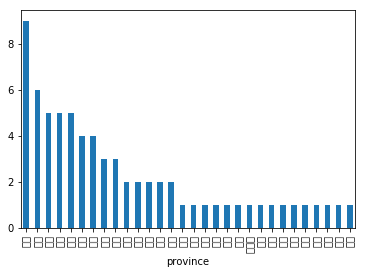

In [4]:
% pylab inline
df.groupby('province')['province'].count().sort_values(ascending = False).plot(kind = 'bar')

## 591租屋網處理

In [3]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv', encoding = 'utf-8', index_col= 0 )
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518


In [32]:
df['city'] = df['address'].str.extract('(.+[市縣]).+[區鎮鄉市].+', expand=False )
df['area'] = df['address'].str.extract('.+[市縣](.+[區鎮鄉市]).+', expand=False )
df['road'] = df['address'].str.extract('.+[區鎮鄉市村](.+[路巷弄街道])', expand=False )

In [37]:
df.loc[100:300,['address', 'city', 'area','road']].head()

,address,city,area,road
100,台北市中山區天祥路,台北市,中山區,天祥路
101,台北市信義區吳興街,台北市,信義區,吳興街
102,台南市永康區永安路,台南市,永康區,永安路
103,屏東縣屏東市瑞光路,屏東縣,屏東市,瑞光路
104,彰化縣員林市莒光路,彰化縣,員林市,莒光路


In [38]:
df[df['address'].str.contains('平鎮')][['address', 'city', 'area', 'road']].head()

,address,city,area,road
49,桃園市平鎮區環南路三段,桃園市,平鎮區,環南路
54,桃園市平鎮區大興路,桃園市,平鎮區,大興路
197,桃園市平鎮區上海路,桃園市,平鎮區,上海路
332,桃園市平鎮區湧安路,桃園市,平鎮區,湧安路
371,桃園市平鎮區龍德路,桃園市,平鎮區,龍德路


In [43]:
def normalizePrice(price):
    return int(price.replace('元/月','').replace(',',''))
df['price'] = df['price'].map(normalizePrice)

In [47]:
df.groupby(['city','building_use'])['price'].mean().sort_values(ascending = False).head()

city  building_use
台北市   別墅/住辦           415000.000000
金門縣   電梯大樓/店面         350000.000000
台中市   廠辦/其他           320500.000000
新竹市   電梯大樓/辦公         276105.754902
台北市   電梯大樓/店面         191418.330827
Name: price, dtype: float64

In [49]:
#df.groupby(['city','building_use'])['price'].mean()
pandas.pivot_table(df, index='city', columns='building_use', values='price', aggfunc='mean')

building_use,倉庫/其他,公寓/住辦,公寓/其他,公寓/分租套房,公寓/店面,公寓/整層住家,公寓/獨立套房,公寓/辦公,公寓/雅房,其他/其他,...,透天厝/辦公,透天厝/雅房,電梯大樓/住辦,電梯大樓/其他,電梯大樓/分租套房,電梯大樓/店面,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/辦公,電梯大樓/雅房
city,,,,,,,,,,,,,,,,,,,,,
南投縣,NaN,5000.000000,NaN,5750.000000,NaN,8500.000000,5535.714286,NaN,3500.000000,NaN,...,13000.000000,4230.000000,27000.000000,NaN,6000.000000,56666.666667,12666.666667,5720.588235,50500.000000,3000.000000
台中市,41178.571429,16837.500000,19000.000000,5726.539823,40546.875000,16119.298113,6542.905563,20556.250000,3922.704545,NaN,...,27675.000000,3974.524823,47771.052632,75263.607143,6825.000000,90288.017467,26273.275725,7927.451311,57332.549918,4558.750000
台北市,15748.888889,34985.252632,24255.444444,10483.768595,84028.315878,29103.239535,11685.724719,55372.391026,6621.349515,NaN,...,40289.473684,6358.142857,52827.219931,132677.964706,12608.626087,191418.330827,64714.588389,20917.632911,165144.147224,7645.088496
台南市,6500.000000,15000.000000,NaN,5466.666667,58772.727273,14885.148515,5483.042945,109333.333333,3253.266667,3500.0,...,18700.000000,3497.950820,20763.545455,25100.000000,5671.960000,60131.700000,18878.738189,6570.472897,24091.724138,3631.818182
台東縣,NaN,NaN,NaN,6000.000000,NaN,NaN,6000.000000,NaN,4750.000000,NaN,...,NaN,3811.111111,NaN,NaN,5500.000000,NaN,NaN,5933.333333,30000.000000,4500.000000
嘉義市,NaN,NaN,NaN,4460.000000,16000.000000,9111.111111,5491.173913,4500.000000,3216.666667,NaN,...,32500.000000,3077.000000,16500.000000,9000.000000,5172.727273,22780.000000,12920.000000,5672.506667,28000.000000,2462.500000
嘉義縣,NaN,NaN,NaN,3150.000000,25000.000000,5500.000000,5350.000000,NaN,2500.000000,NaN,...,23500.000000,2175.000000,NaN,NaN,6256.666667,9750.000000,14166.666667,4047.518519,NaN,2500.000000
基隆市,NaN,10000.000000,9000.000000,5727.392857,40951.612903,11327.536232,6290.625000,17500.000000,3841.666667,NaN,...,15750.000000,6833.333333,26280.000000,12000.000000,6836.363636,64842.105263,16079.371134,8044.680851,67214.538462,4000.000000
宜蘭縣,8000.000000,8000.000000,NaN,5481.818182,17666.666667,11938.461538,6988.888889,15000.000000,4875.000000,NaN,...,20000.000000,4216.666667,45000.000000,NaN,7071.428571,56749.750000,16937.142857,8781.309735,39166.666667,4250.000000


Populating the interactive namespace from numpy and matplotlib


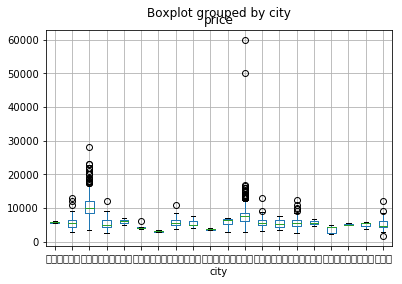

In [52]:
%pylab inline
df[df['building_use'] == '公寓/分租套房'].boxplot(column='price',by='city')